# Objectives¶
# Develop a predictive model that accurately predicts the likelihood of insurance claims.
# Address the class imbalance issue in the dataset to ensure the model maintains high predictive accuracy across both classes (claims vs. non-claims).
# Evaluate the performance of the model using appropriate metrics such as precision, recall, F1-score, and ROC-AUC.
# Fine-tune the model parameters and explore different algorithms to improve its performance.
# Provide insights and recommendations based on the model's predictions to help insurers better assess risk and allocate resources effectively.

In [ ]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier


from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score
)

import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv(r'C:\Users\FAUZAN\OneDrive\Desktop\INSURANCE CLAIM\Insurance claims data.csv\Insurance claims data.csv')

In [3]:
print(df) 

       policy_id  subscription_length  vehicle_age  customer_age region_code  \
0      POL045360                  9.3          1.2            41          C8   
1      POL016745                  8.2          1.8            35          C2   
2      POL007194                  9.5          0.2            44          C8   
3      POL018146                  5.2          0.4            44         C10   
4      POL049011                 10.1          1.0            56         C13   
...          ...                  ...          ...           ...         ...   
58587  POL019269                 10.6          2.6            48          C5   
58588  POL001254                  2.3          2.2            37          C3   
58589  POL019859                  6.6          2.2            35          C8   
58590  POL014061                  4.1          3.6            44          C8   
58591  POL054184                  3.1          0.4            49         C12   

       region_density segment model fue

In [4]:
print(df.columns)


Index(['policy_id', 'subscription_length', 'vehicle_age', 'customer_age',
       'region_code', 'region_density', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'steering_type', 'turning_radius', 'length',
       'width', 'gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'claim_status'],
      dtype='object')


# Description of Columns 

# policy_id: Unique identifier for the insurance policy.
# subscription_length: The duration for which the insurance policy is active.
# vehicle_age: Age of the vehicle insured.
# customer_age: Age of the insurance policyholder.
# region_code: The code representing the geographical region of the policyholder.
# region_density: Population density of the policyholder’s region.
# segment: Segment of the vehicle.
# model: The model of the vehicle.
# fuel_type: Type of fuel the vehicle uses (e.g., Petrol, Diesel, CNG).
# max_torque, max_power: Engine performance characteristics.
# engine_type: The type of engine.
# airbags: The number of airbags in the vehicle.
# is_esc (Electronic Stability Control), is_adjustable_steering, is_tpms (Tire Pressure Monitoring System): Features that enhance vehicle safety.
# is_parking_sensors, is_parking_camera: Parking aids.
# rear_brakes_type: Type of rear brakes.
# displacement, cylinder: Specifications related to the engine size and construction.
# transmission_type: Type of transmission.
# steering_type: Type of steering mechanism.
# turning_radius: Turning radius of the vehicle.
# length, width, gross_weight: Dimensions and weight of the vehicle.
# is_front_fog_lights, is_rear_window_wiper, is_rear_window_washer, is_rear_window_defogger, is_brake_assist, is_power_door_locks, is_central_locking, is_power_steering, is_driver_seat_height_adjustable, is_day_night_rear_view_mirror, is_ecw, is_speed_alert: Various binary indicators for specific vehicle amenities and safety features.
# ncap_rating: NCAP safety rating of the vehicle.
# claim_status: Indicates whether a claim was made (1) or not (0).


In [5]:
df.isnull().sum()


policy_id                           0
subscription_length                 0
vehicle_age                         0
customer_age                        0
region_code                         0
region_density                      0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
steering_type                       0
turning_radius                      0
length                              0
width                               0
gross_weight

In [ ]:
print("First 5 rows of the DataFrame:")
print(df.head())
print("\nDataFrame information:")
print(df.info())
print("\nSummary statistics:")
print(df.describe())


First 5 rows of the DataFrame:
   policy_id  subscription_length  vehicle_age  customer_age region_code  \
0  POL045360                  9.3          1.2            41          C8   
1  POL016745                  8.2          1.8            35          C2   
2  POL007194                  9.5          0.2            44          C8   
3  POL018146                  5.2          0.4            44         C10   
4  POL049011                 10.1          1.0            56         C13   

   region_density segment model fuel_type     max_torque  ... is_brake_assist  \
0            8794      C2    M4    Diesel  250Nm@2750rpm  ...             Yes   
1           27003      C1    M9    Diesel  200Nm@1750rpm  ...              No   
2            8794      C2    M4    Diesel  250Nm@2750rpm  ...             Yes   
3           73430       A    M1       CNG   60Nm@3500rpm  ...              No   
4            5410      B2    M5    Diesel  200Nm@3000rpm  ...              No   

  is_power_door_locks  is

In [7]:
print("\nMissing values per column:")
print(df.isnull().sum())



Missing values per column:
policy_id                           0
subscription_length                 0
vehicle_age                         0
customer_age                        0
region_code                         0
region_density                      0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
steering_type                       0
turning_radius                      0
length                              0
width                 


Value counts for segment:
segment
B2         18314
A          17321
C2         14018
B1          4173
C1          3557
Utility     1209
Name: count, dtype: int64


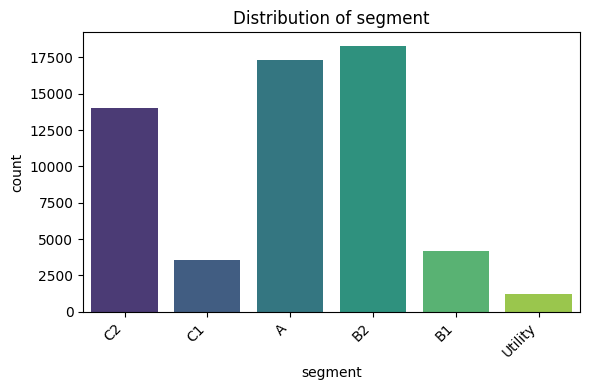


Value counts for model:
model
M1     14948
M4     14018
M6     13776
M8      4173
M7      2940
M3      2373
M9      2114
M5      1598
M10     1209
M2      1080
M11      363
Name: count, dtype: int64


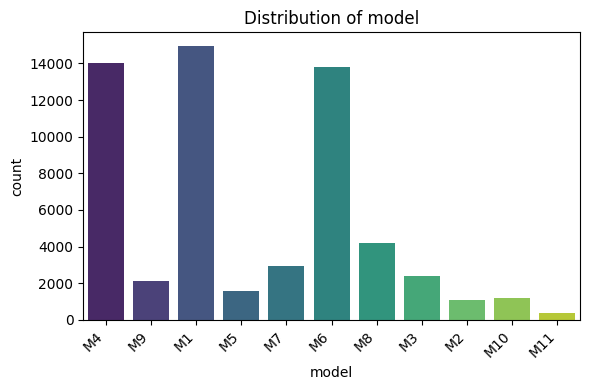


Value counts for fuel_type:
fuel_type
Petrol    20532
CNG       20330
Diesel    17730
Name: count, dtype: int64


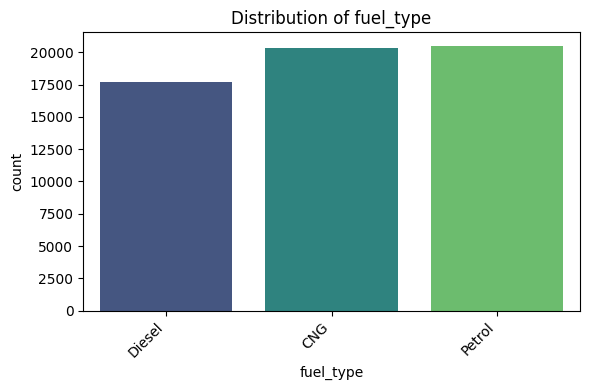


Value counts for transmission_type:
transmission_type
Manual       38181
Automatic    20411
Name: count, dtype: int64


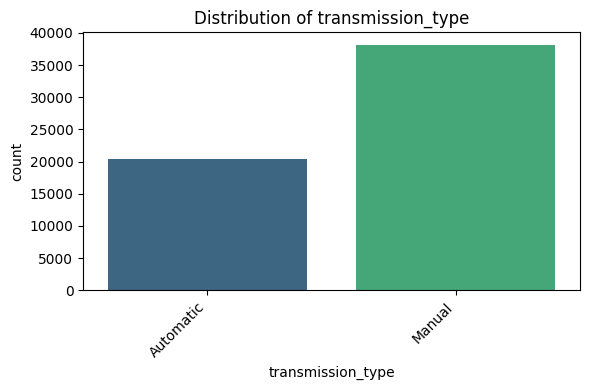


Value counts for steering_type:
steering_type
Power       33502
Electric    23881
Manual       1209
Name: count, dtype: int64


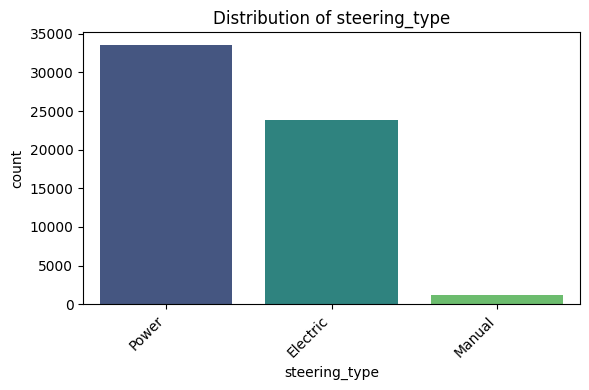


Value counts for claim_status:
claim_status
0    54844
1     3748
Name: count, dtype: int64


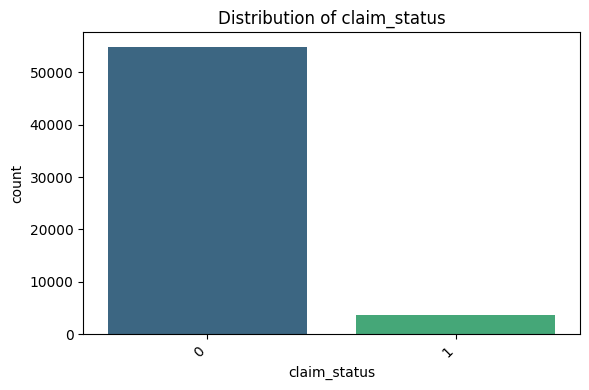

In [8]:
categorical_cols = ['segment', 'model', 'fuel_type', 'transmission_type', 'steering_type', 'claim_status']

for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
    plt.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.show()


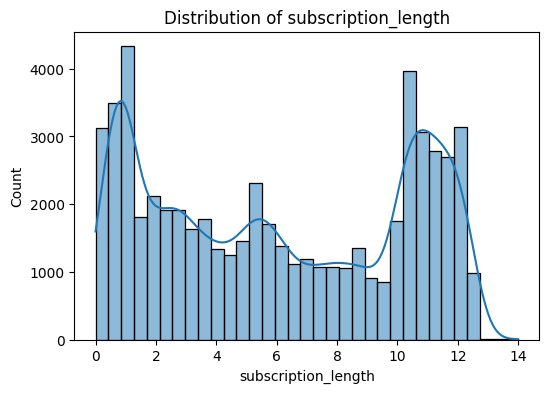

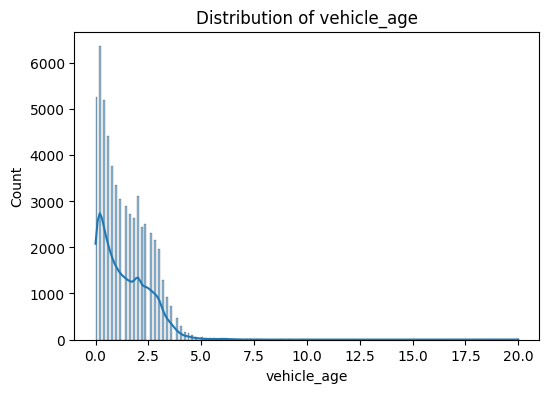

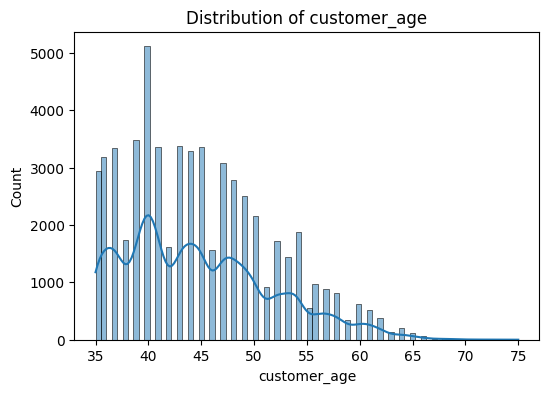

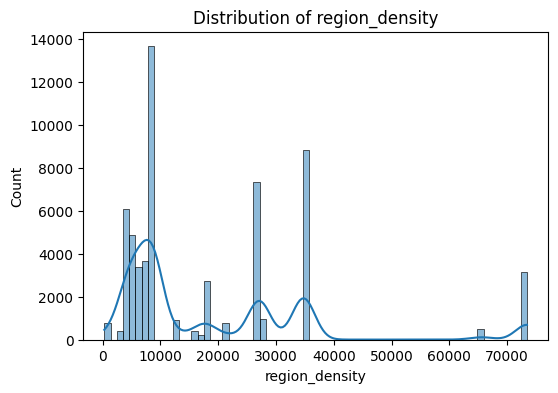

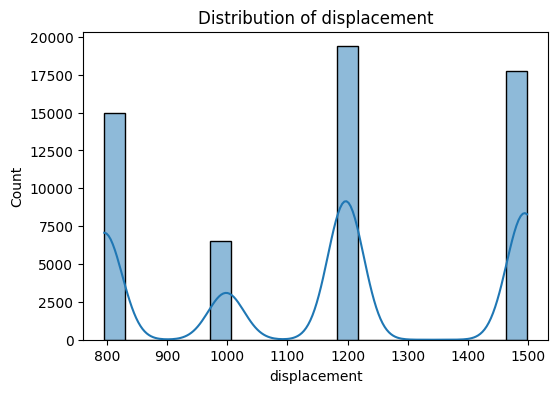

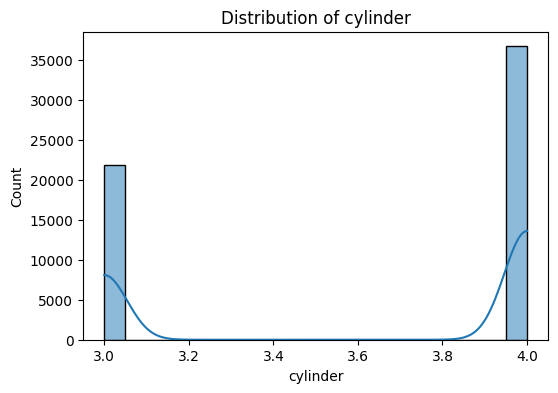

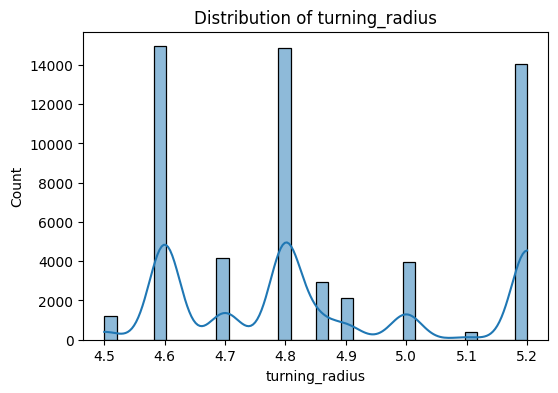

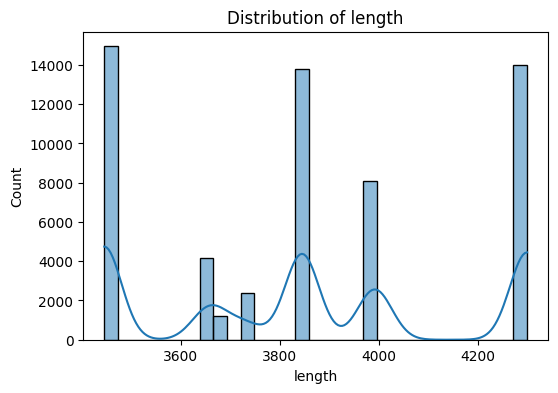

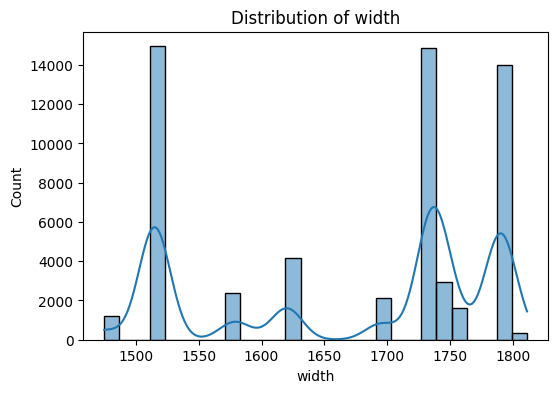

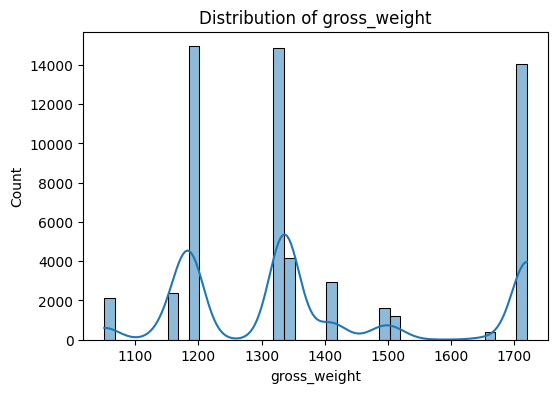

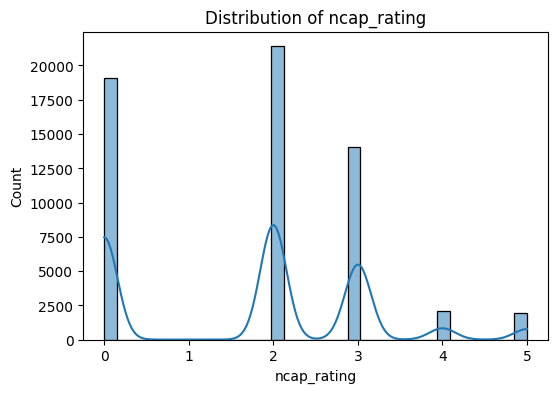

In [9]:
numerical_cols = ['subscription_length', 'vehicle_age', 'customer_age', 'region_density', 'displacement', 'cylinder', 'turning_radius', 'length', 'width', 'gross_weight', 'ncap_rating']

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, palette='viridis') #kde=True adds a kernel density estimate
    plt.title(f'Distribution of {col}')
    plt.show()



# Target Variable Distribution

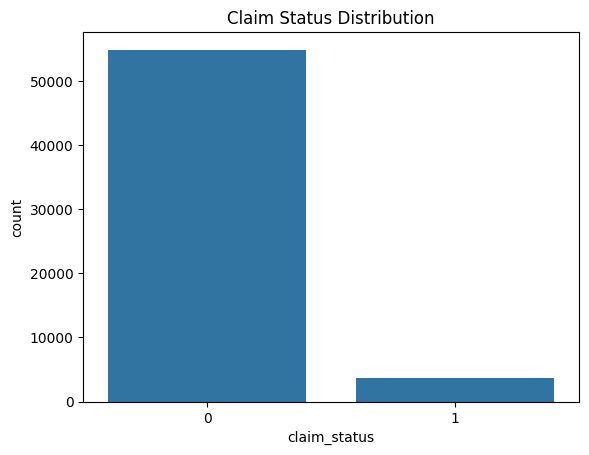

claim_status
0    93.603222
1     6.396778
Name: proportion, dtype: float64

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='claim_status', data=df)
plt.title("Claim Status Distribution")
plt.show()

# Percentage
df['claim_status'].value_counts(normalize=True) * 100


# CLAIM vs VEHICLE AGE

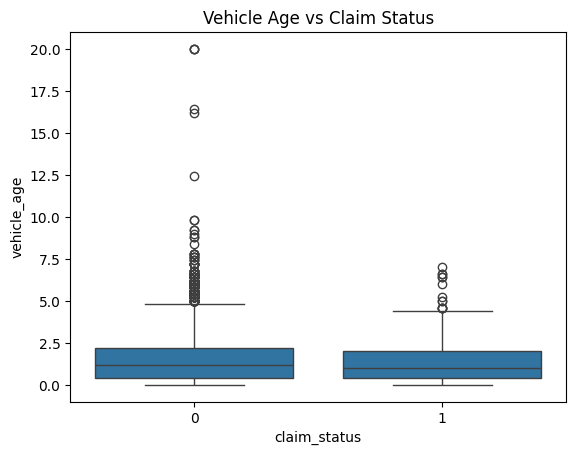

In [11]:
sns.boxplot(x='claim_status', y='vehicle_age', data=df)
plt.title("Vehicle Age vs Claim Status")
plt.show()


# SAFETY FEATURES IMPACT ON CLAIMS

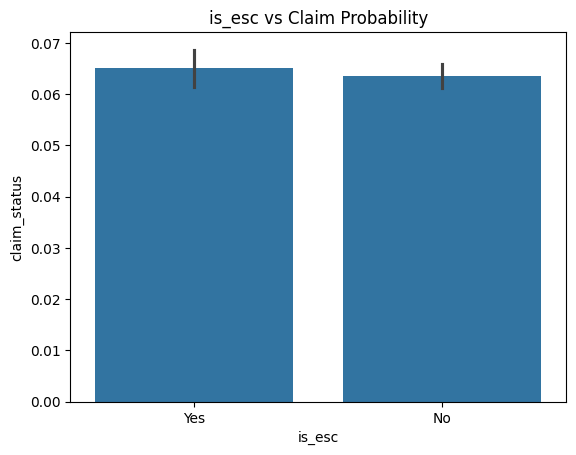

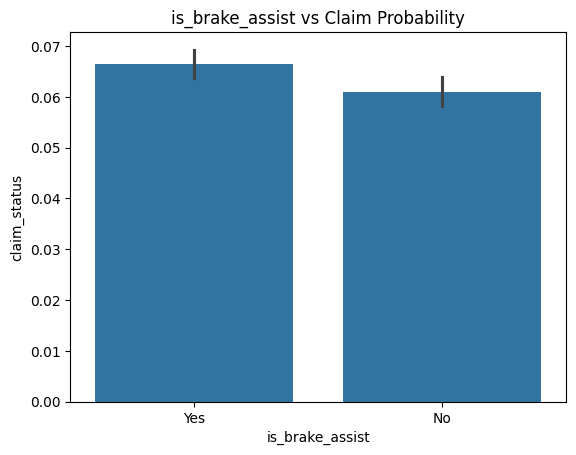

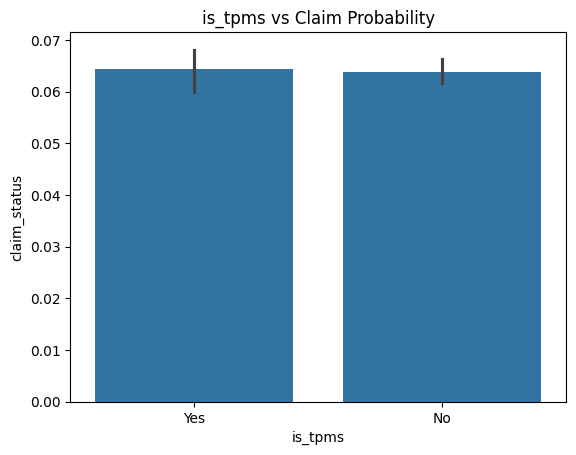

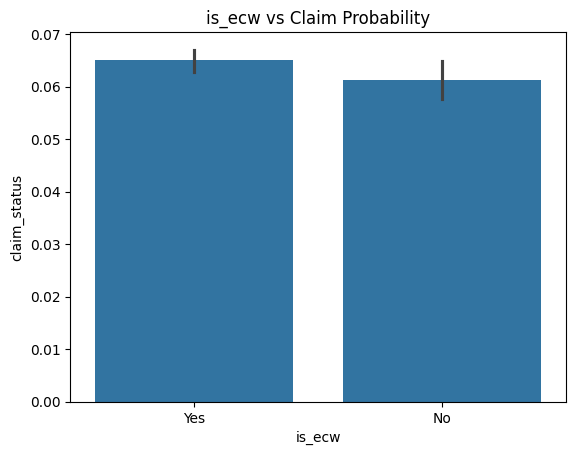

In [12]:
safety_cols = ['is_esc', 'is_brake_assist', 'is_tpms', 'is_ecw']

for col in safety_cols:
    sns.barplot(x=col, y='claim_status', data=df)
    plt.title(f"{col} vs Claim Probability")
    plt.show()


# REGION RISK ANALYSIS

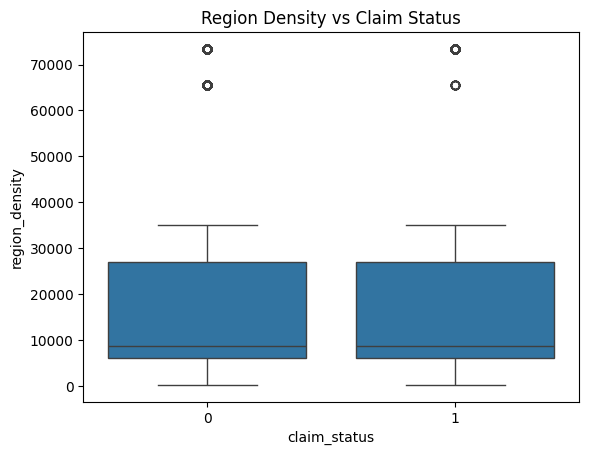

In [13]:
sns.boxplot(x='claim_status', y='region_density', data=df)
plt.title("Region Density vs Claim Status")
plt.show()


# CORRELATION

In [14]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])


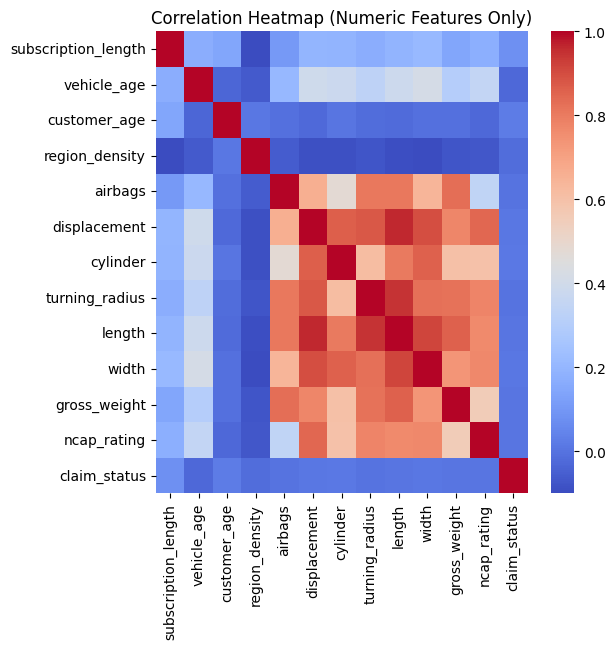

In [15]:
plt.figure(figsize=(6,6))
sns.heatmap(numeric_df.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


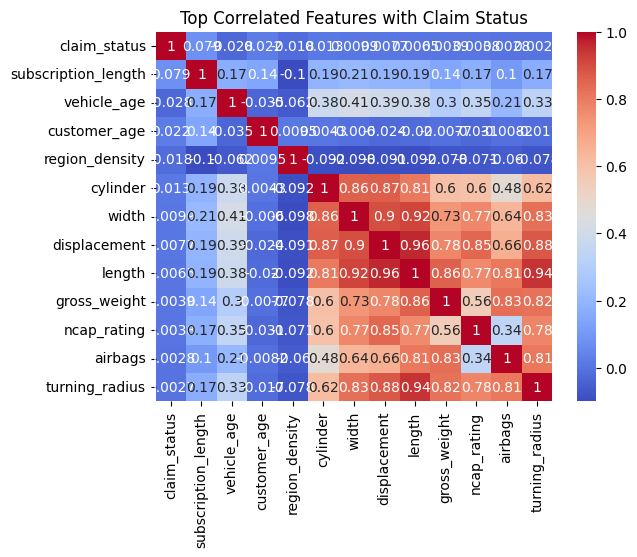

In [16]:
corr = numeric_df.corr()

# Select features most correlated with target
target_corr = corr['claim_status'].abs().sort_values(ascending=False)

top_features = target_corr.index[:15]
sns.heatmap(corr.loc[top_features, top_features], cmap='coolwarm', annot=True)
plt.title("Top Correlated Features with Claim Status")
plt.show()


# INSIGHTS

Claim Distribution (%):
 claim_status
0    93.603222
1     6.396778
Name: proportion, dtype: float64


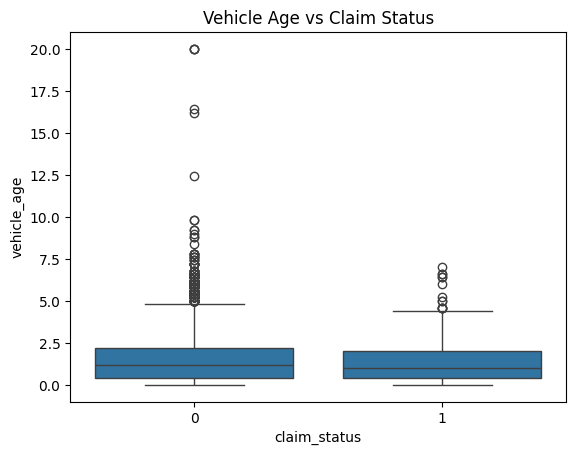

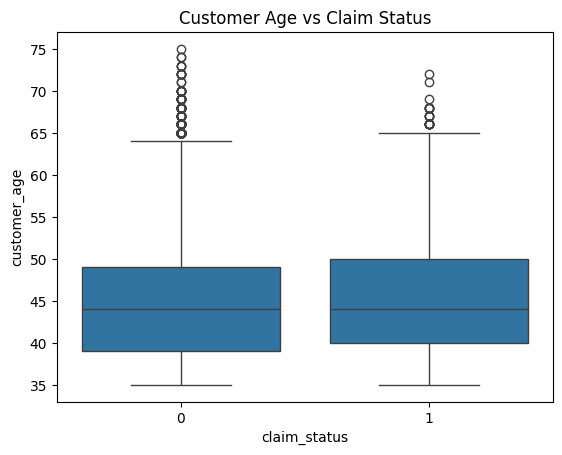

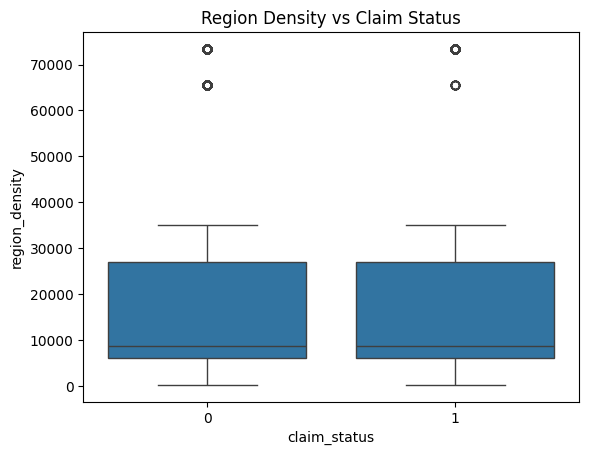

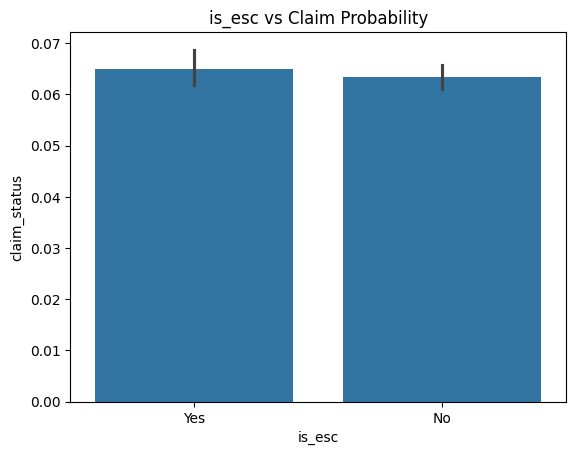

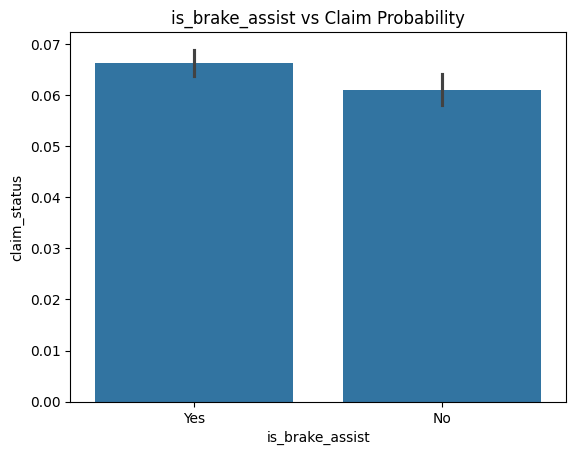

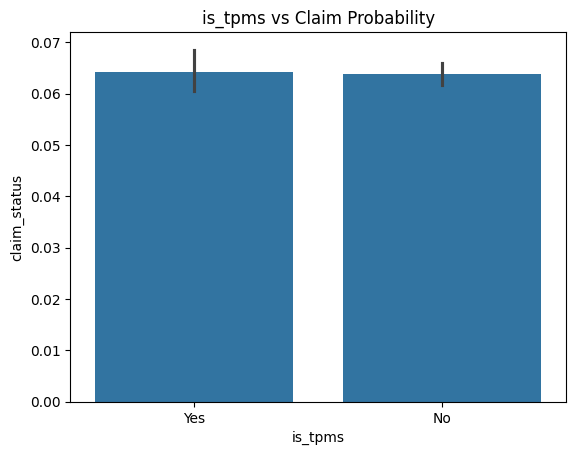

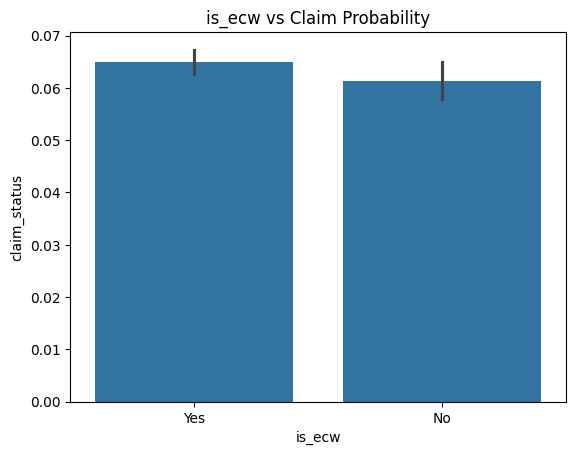

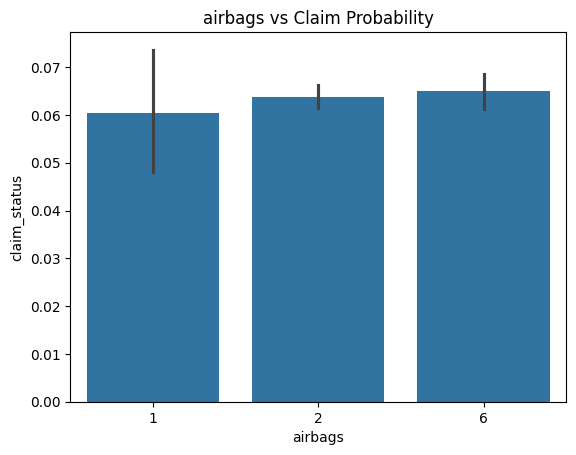

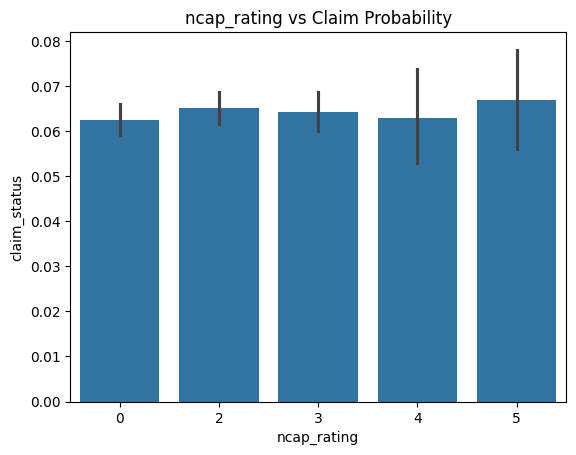

In [17]:
# Target distribution
claim_dist = df['claim_status'].value_counts(normalize=True) * 100
print("Claim Distribution (%):\n", claim_dist)

# Vehicle age impact
sns.boxplot(x='claim_status', y='vehicle_age', data=df)
plt.title("Vehicle Age vs Claim Status")
plt.show()

# Customer age impact
sns.boxplot(x='claim_status', y='customer_age', data=df)
plt.title("Customer Age vs Claim Status")
plt.show()

# Region density vs claim
sns.boxplot(x='claim_status', y='region_density', data=df)
plt.title("Region Density vs Claim Status")
plt.show()

# Safety features impact
safety_cols = ['is_esc', 'is_brake_assist', 'is_tpms', 'is_ecw', 'airbags', 'ncap_rating']
for col in safety_cols:
    sns.barplot(x=col, y='claim_status', data=df)
    plt.title(f"{col} vs Claim Probability")
    plt.show()


In [18]:
X = df[['vehicle_age', 'airbags', 'ncap_rating', 'is_esc', 'customer_age']]
y = df['claim_status']


In [19]:
cat_cols = X.select_dtypes(include='object').columns
print(cat_cols)


Index(['is_esc'], dtype='object')


In [20]:
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)


In [21]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)



In [22]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print("Before SMOTE:\n", y_train.value_counts())
print("\nAfter SMOTE:\n", y_train_bal.value_counts())


Before SMOTE:
 claim_status
0    43875
1     2998
Name: count, dtype: int64

After SMOTE:
 claim_status
0    43875
1    43875
Name: count, dtype: int64


In [23]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score


In [24]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_bal, y_train_bal)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

print("\nRandom Forest Evaluation:")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_rf))





Random Forest Evaluation:
              precision    recall  f1-score   support

           0       0.94      0.81      0.87     10969
           1       0.09      0.26      0.13       750

    accuracy                           0.78     11719
   macro avg       0.51      0.53      0.50     11719
weighted avg       0.89      0.78      0.82     11719

ROC-AUC Score: 0.5444165679034856


In [25]:
import joblib

# Save the trained Random Forest model
joblib.dump(rf, "rf_model.pkl")

# Save the feature columns you used for training
feature_columns = X.columns.tolist()
joblib.dump(feature_columns, "feature_columns.pkl")

print("✅ Model and feature columns saved successfully!")


✅ Model and feature columns saved successfully!


# Top 5 Feature Importance DataFrame (Random Forest)

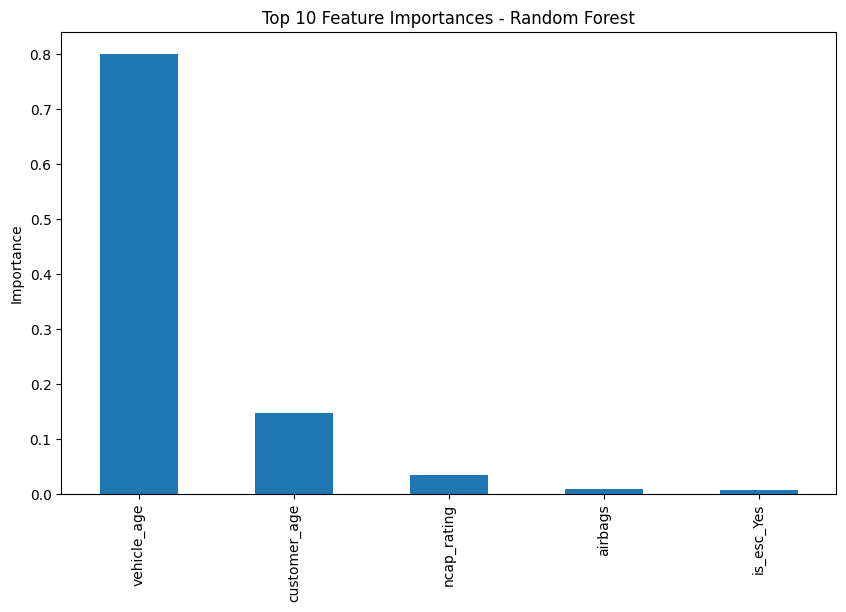

In [26]:
# Feature Importance - Random Forest
importances_rf = pd.Series(rf.feature_importances_, index=X.columns)
plt.figure(figsize=(10,6))
importances_rf.sort_values(ascending=False).head(5).plot(kind='bar')
plt.title("Top 10 Feature Importances - Random Forest")
plt.ylabel("Importance")
plt.show()


In [27]:
top5_rf = (
    pd.DataFrame({
        'Feature': X.columns,
        'Importance': rf.feature_importances_
    })
    .sort_values(by='Importance', ascending=False)
    .head(5)
    .reset_index(drop=True)
)

top5_rf


,Feature,Importance
0,vehicle_age,0.800753
1,customer_age,0.147328
2,ncap_rating,0.034881
3,airbags,0.009132
4,is_esc_Yes,0.007907


In [28]:
# 7. GRADIENT BOOSTING MODEL
# ===============================
gb = GradientBoostingClassifier(n_estimators=200, random_state=42)
gb.fit(X_train_bal, y_train_bal)

y_pred_gb = gb.predict(X_test)
y_prob_gb = gb.predict_proba(X_test)[:, 1]

print("\nGradient Boosting Evaluation:")
print(classification_report(y_test, y_pred_gb))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_gb))



Gradient Boosting Evaluation:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     10969
           1       0.10      0.12      0.11       750

    accuracy                           0.87     11719
   macro avg       0.52      0.52      0.52     11719
weighted avg       0.89      0.87      0.88     11719

ROC-AUC Score: 0.5628612757164129


# Top 5 Feature Importance DataFrame (Gradient Boosting)

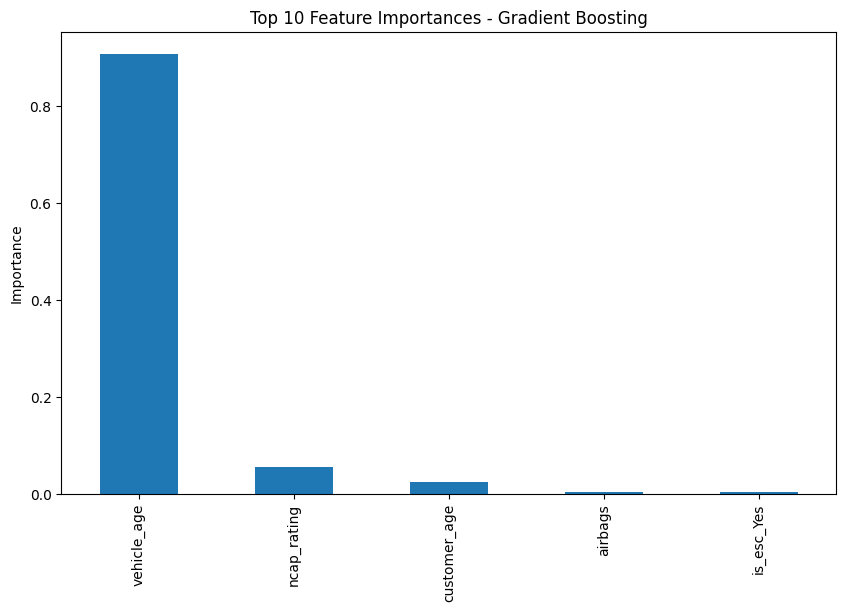

In [29]:
# Feature Importance - Gradient Boosting
importances_gb = pd.Series(gb.feature_importances_, index=X.columns)
plt.figure(figsize=(10,6))
importances_gb.sort_values(ascending=False).head(5).plot(kind='bar')
plt.title("Top 10 Feature Importances - Gradient Boosting")
plt.ylabel("Importance")
plt.show()

In [30]:
top5_gb = (
    pd.DataFrame({
        'Feature': X.columns,
        'Importance': gb.feature_importances_
    })
    .sort_values(by='Importance', ascending=False)
    .head(5)
    .reset_index(drop=True)
)

top5_gb


,Feature,Importance
0,vehicle_age,0.907841
1,ncap_rating,0.056671
2,customer_age,0.025237
3,airbags,0.005137
4,is_esc_Yes,0.005115


In [31]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_bal, y_train_bal)

y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:, 1]

print("Logistic Regression Evaluation:")
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_lr))


Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       0.94      0.48      0.64     10969
           1       0.07      0.55      0.12       750

    accuracy                           0.49     11719
   macro avg       0.50      0.52      0.38     11719
weighted avg       0.88      0.49      0.60     11719

ROC-AUC Score: 0.5363742668733096


# Top 5 Features – Logistic Regression

In [32]:
top5_lr = (
    pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': lr.coef_[0]
    })
)

top5_lr['Abs_Coefficient'] = top5_lr['Coefficient'].abs()

top5_lr = (
    top5_lr
    .sort_values(by='Abs_Coefficient', ascending=False)
    .head(5)
    .reset_index(drop=True)
)

top5_lr


,Feature,Coefficient,Abs_Coefficient
0,vehicle_age,-0.153391,0.153391
1,is_esc_Yes,0.101411,0.101411
2,ncap_rating,0.041610,0.041610
3,airbags,-0.025647,0.025647
4,customer_age,0.010531,0.010531
